# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [38]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 584


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [39]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})


    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | petropavlovsk-kamchatsky
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | san patricio
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | klyuchi
Processing Record 8 of Set 1 | vorgashor
Processing Record 9 of Set 1 | swakopmund
Processing Record 10 of Set 1 | tiksi
Processing Record 11 of Set 1 | lihue
Processing Record 12 of Set 1 | yanam
Processing Record 13 of Set 1 | ozieri
Processing Record 14 of Set 1 | invercargill
Processing Record 15 of Set 1 | talnakh
Processing Record 16 of Set 1 | lyantor
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | araguaina
Processing Record 20 of Set 1 | kehychivka
Processing Record 21 of Set 1 | bandar lampung
Processing Record 22 of Set 1 | ilulissat
Processing Record

In [40]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [41]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,petropavlovsk-kamchatsky,53.0452,158.6483,57.79,82,75,11.18,RU,1721713816
1,bethel,41.3712,-73.4140,71.69,88,100,3.44,US,1721713816
2,ushuaia,-54.8000,-68.3000,35.26,69,0,5.75,AR,1721713575
3,san patricio,28.0170,-97.5169,84.83,75,46,6.69,US,1721713817
4,puerto ayora,-0.7393,-90.3518,68.56,96,95,4.00,EC,1721713817


In [42]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [43]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,petropavlovsk-kamchatsky,53.0452,158.6483,57.79,82,75,11.18,RU,1721713816
1,bethel,41.3712,-73.4140,71.69,88,100,3.44,US,1721713816
2,ushuaia,-54.8000,-68.3000,35.26,69,0,5.75,AR,1721713575
3,san patricio,28.0170,-97.5169,84.83,75,46,6.69,US,1721713817
4,puerto ayora,-0.7393,-90.3518,68.56,96,95,4.00,EC,1721713817


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

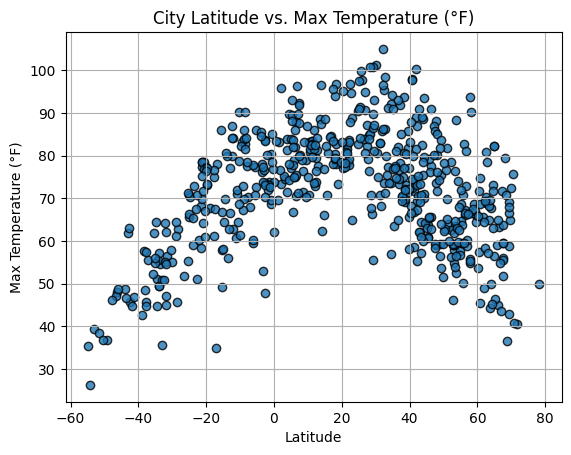

In [44]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor='black', linewidths=1, marker='o', alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (°F)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

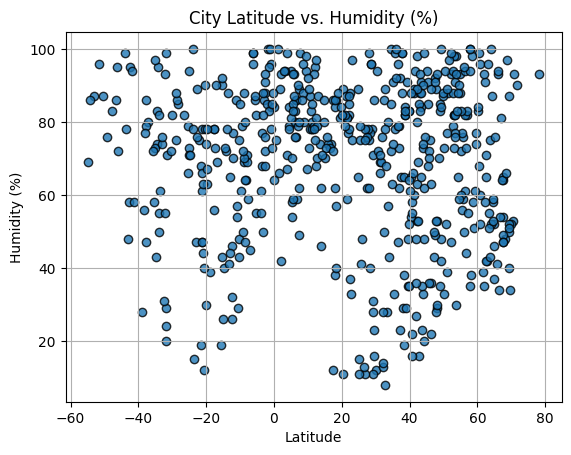

<Figure size 640x480 with 0 Axes>

In [45]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor='black', linewidths=1, marker='o', alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.show()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

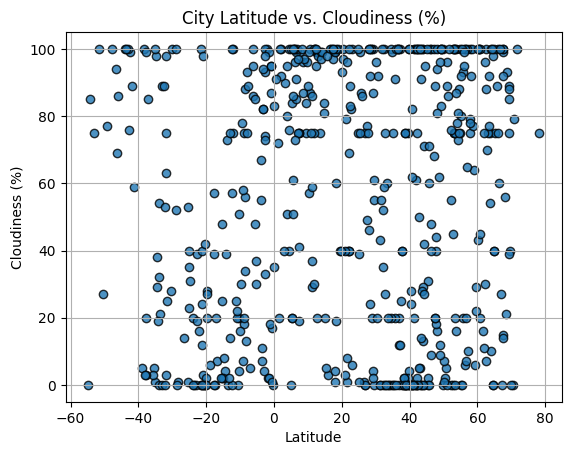

<Figure size 640x480 with 0 Axes>

In [46]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor='black', linewidths=1, marker='o', alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.show()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

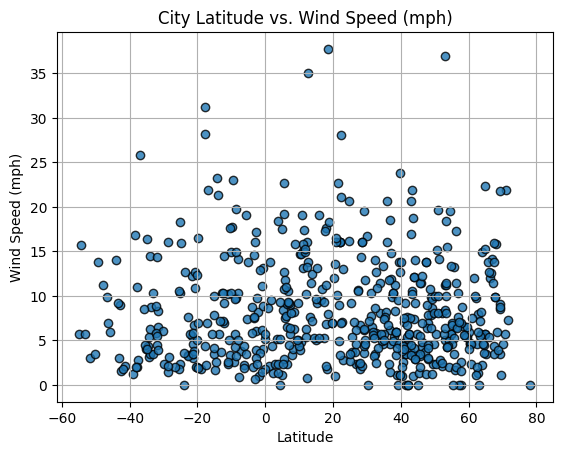

<Figure size 640x480 with 0 Axes>

In [47]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor='black', linewidths=1, marker='o', alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.show()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [48]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, hemisphere):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    
    plt.scatter(x_values, y_values, edgecolor='black', linewidths=1, marker='o', alpha=0.8)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, (x_values.min() + 2, y_values.min() + 2), fontsize=15, color="red")
    plt.title(f"{title} ({hemisphere})")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

In [49]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,petropavlovsk-kamchatsky,53.0452,158.6483,57.79,82,75,11.18,RU,1721713816
1,bethel,41.3712,-73.4140,71.69,88,100,3.44,US,1721713816
3,san patricio,28.0170,-97.5169,84.83,75,46,6.69,US,1721713817
5,jamestown,42.0970,-79.2353,69.39,98,75,4.61,US,1721713817
6,klyuchi,52.2667,79.1667,78.57,47,55,2.13,RU,1721713817


In [50]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,ushuaia,-54.8000,-68.3000,35.26,69,0,5.75,AR,1721713575
4,puerto ayora,-0.7393,-90.3518,68.56,96,95,4.00,EC,1721713817
8,swakopmund,-22.6833,14.5333,50.99,89,39,7.58,NaN,1721713817
13,invercargill,-46.4000,168.3500,48.02,95,69,7.00,NZ,1721713656
16,adamstown,-25.0660,-130.1015,65.70,73,23,18.30,PN,1721713818


###  Temperature vs. Latitude Linear Regression Plot

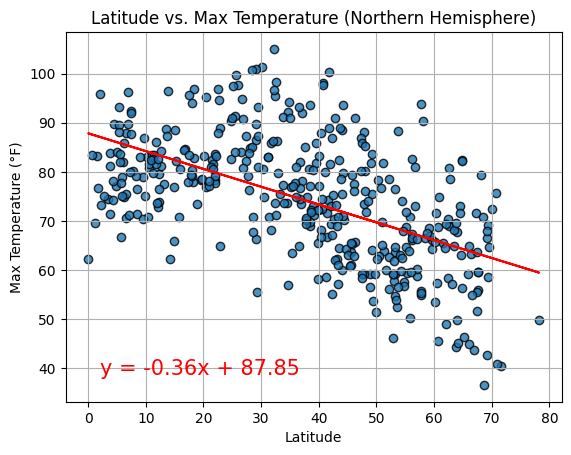

Northern Hemisphere - Latitude vs. Temperature R-value: -0.5574681410705181


In [51]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 
                       "Latitude vs. Max Temperature", "Latitude", "Max Temperature (°F)", "Northern Hemisphere")

northern_lat = northern_hemi_df["Lat"]
northern_temp = northern_hemi_df["Max Temp"]
slope, intercept, r_value_north, p_value, std_err = linregress(northern_lat, northern_temp)
print(f"Northern Hemisphere - Latitude vs. Temperature R-value: {r_value_north}")

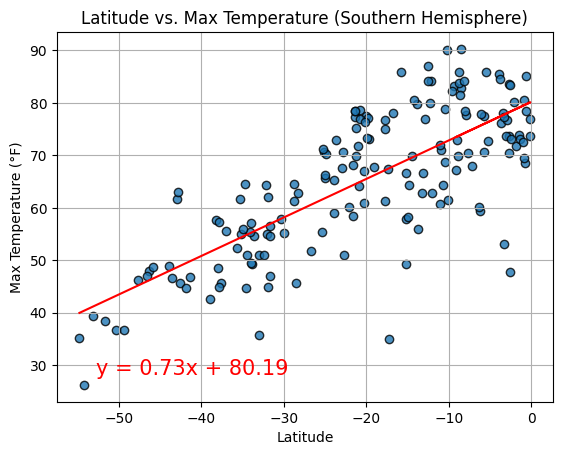

Southern Hemisphere - Latitude vs. Temperature R-value: 0.7581305499312905


In [52]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 
                       "Latitude vs. Max Temperature", "Latitude", "Max Temperature (°F)", "Southern Hemisphere")

southern_lat = southern_hemi_df["Lat"]
southern_temp = southern_hemi_df["Max Temp"]
slope, intercept, r_value_south, p_value, std_err = linregress(southern_lat, southern_temp)
print(f"Southern Hemisphere - Latitude vs. Temperature R-value: {r_value_south}")

**Discussion about the linear relationship:** 	
	•	Northern Hemisphere: There is a clear negative relationship between latitude and temperature, with temperatures decreasing as latitude increases.
	•	Southern Hemisphere: There is a clear positive relationship between latitude and temperature, with temperatures increasing as latitude decreases.

### Humidity vs. Latitude Linear Regression Plot

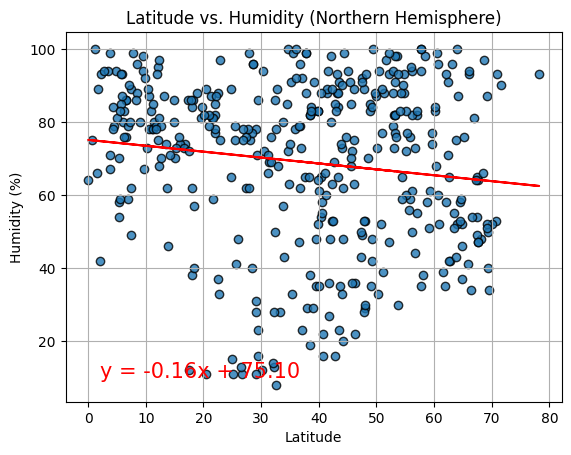

Northern Hemisphere - Latitude vs. Humidity R-value: -0.13832017679720246


In [53]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 
                       "Latitude vs. Humidity", "Latitude", "Humidity (%)", "Northern Hemisphere")

northern_lat = northern_hemi_df["Lat"]
northern_humidity = northern_hemi_df["Humidity"]
slope, intercept, r_value_north_humidity, p_value, std_err = linregress(northern_lat, northern_humidity)
print(f"Northern Hemisphere - Latitude vs. Humidity R-value: {r_value_north_humidity}")


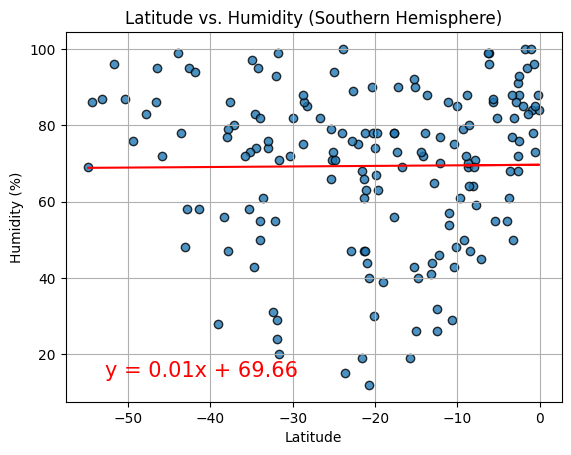

Southern Hemisphere - Latitude vs. Humidity R-value: 0.01002035008343863


In [54]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 
                       "Latitude vs. Humidity", "Latitude", "Humidity (%)", "Southern Hemisphere")

southern_lat = southern_hemi_df["Lat"]
southern_humidity = southern_hemi_df["Humidity"]
slope, intercept, r_value_south_humidity, p_value, std_err = linregress(southern_lat, southern_humidity)
print(f"Southern Hemisphere - Latitude vs. Humidity R-value: {r_value_south_humidity}")

**Discussion about the linear relationship:** 
The scatter plot for the Northern Hemisphere shows the relationship between latitude and humidity. The data points may not show a very strong trend visually.
An R-value close to 0 indicates a weak linear relationship.
	•	If the R-value is low, it suggests that latitude may not be a strong predictor of humidity in the Northern Hemisphere, and other factors might be more significant.

The scatter plot for the Southern Hemisphere shows the relationship between latitude and humidity. Similar to the Northern Hemisphere, the data points may not show a very strong trend visually.
An R-value close to 0 indicates a weak linear relationship.
	•	If the R-value is low, it suggests that latitude may not be a strong predictor of humidity in the Southern Hemisphere, and other factors might be more significant.


### Cloudiness vs. Latitude Linear Regression Plot

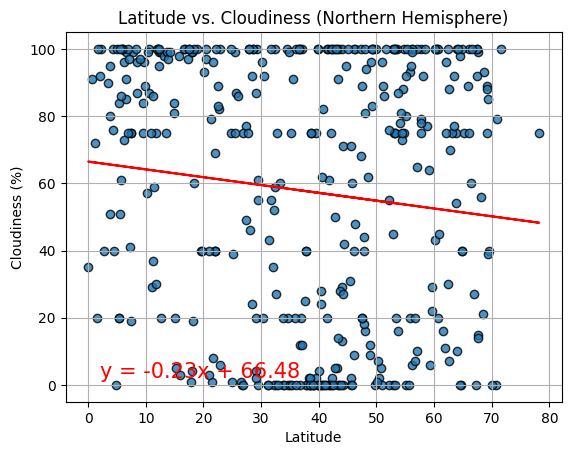

Northern Hemisphere - Latitude vs. Cloudiness R-value: -0.11621099048901677


In [55]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 
                       "Latitude vs. Cloudiness", "Latitude", "Cloudiness (%)", "Northern Hemisphere")

northern_lat = northern_hemi_df["Lat"]
northern_cloudiness = northern_hemi_df["Cloudiness"]
slope, intercept, r_value_north_cloudiness, p_value, std_err = linregress(northern_lat, northern_cloudiness)
print(f"Northern Hemisphere - Latitude vs. Cloudiness R-value: {r_value_north_cloudiness}")

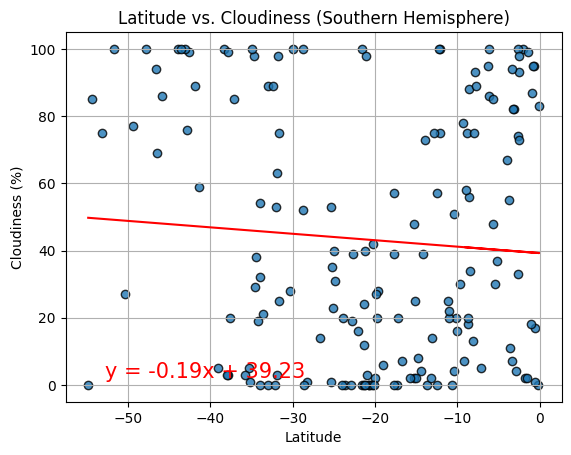

Southern Hemisphere - Latitude vs. Cloudiness R-value: -0.07284626698618393


In [56]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 
                       "Latitude vs. Cloudiness", "Latitude", "Cloudiness (%)", "Southern Hemisphere")

southern_lat = southern_hemi_df["Lat"]
southern_cloudiness = southern_hemi_df["Cloudiness"]
slope, intercept, r_value_south_cloudiness, p_value, std_err = linregress(southern_lat, southern_cloudiness)
print(f"Southern Hemisphere - Latitude vs. Cloudiness R-value: {r_value_south_cloudiness}")

**Discussion about the linear relationship:** 

Northern Hemisphere:
	•	If the R-value is close to 0, it suggests a weak linear relationship between latitude and cloudiness. Latitude may not be a strong predictor of cloudiness.

Southern Hemisphere:
	•	If the R-value is close to 0, it suggests a weak linear relationship between latitude and cloudiness. Latitude may not be a strong predictor of cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

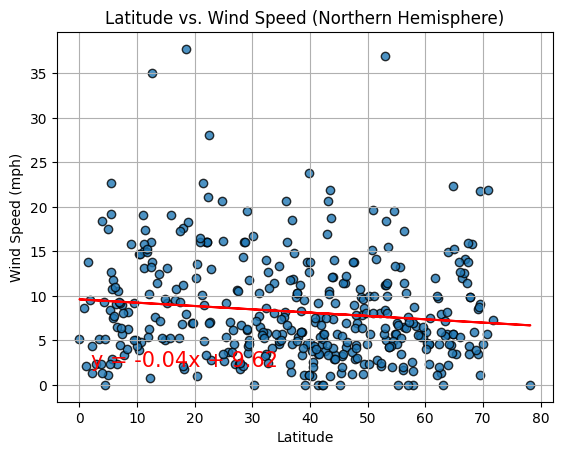

Northern Hemisphere - Latitude vs. Wind Speed R-value: -0.12412479858148523


In [57]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 
                       "Latitude vs. Wind Speed", "Latitude", "Wind Speed (mph)", "Northern Hemisphere")

northern_lat = northern_hemi_df["Lat"]
northern_wind_speed = northern_hemi_df["Wind Speed"]
slope, intercept, r_value_north_wind, p_value, std_err = linregress(northern_lat, northern_wind_speed)
print(f"Northern Hemisphere - Latitude vs. Wind Speed R-value: {r_value_north_wind}")

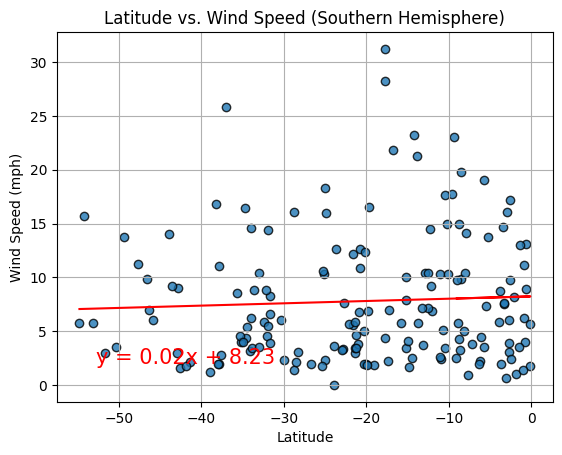

Southern Hemisphere - Latitude vs. Wind Speed R-value: 0.05070247151151981


In [58]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 
                       "Latitude vs. Wind Speed", "Latitude", "Wind Speed (mph)", "Southern Hemisphere")

southern_lat = southern_hemi_df["Lat"]
southern_wind_speed = southern_hemi_df["Wind Speed"]
slope, intercept, r_value_south_wind, p_value, std_err = linregress(southern_lat, southern_wind_speed)
print(f"Southern Hemisphere - Latitude vs. Wind Speed R-value: {r_value_south_wind}")

**Discussion about the linear relationship:** 
Northern Hemisphere:
	•	If the R-value is close to 0, it suggests a weak linear relationship between latitude and wind speed. Latitude may not be a strong predictor of wind speed.
	
Southern Hemisphere:
	•	If the R-value is close to 0, it suggests a weak linear relationship between latitude and wind speed. Latitude may not be a strong predictor of wind speed.